In [39]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.0f}'.format)

In [40]:
df_dict = dict()

# Dataframes of GDP constant 2015 USD
[Total](https://data360.worldbank.org/en/indicator/WB_WDI_NY_GDP_MKTP_KD) \
[Per Capita](https://data360.worldbank.org/en/indicator/WB_WDI_NY_GDP_MKTP_KD)

In [41]:
df_dict['df_per_capita'] = pd.read_csv('data/per_capita.csv')

In [42]:
df_dict['df_total'] = pd.read_csv('data/total.csv')

# Dataframes of GDP constant 2017 USD PPP
[Total](https://data360.worldbank.org/en/indicator/WB_WDI_NY_GDP_MKTP_PP_KD) \
[Per Capita](https://data360.worldbank.org/en/indicator/WB_WDI_NY_GDP_PCAP_PP_KD)

In [43]:
df_dict['df_pc_ppp'] = pd.read_csv('data/per_capita_ppp.csv')

In [44]:
df_dict['df_ppp'] = pd.read_csv('data/total_ppp.csv')


--------------------------

In [45]:
set1 = set(df_dict['df_total'].columns)
set2 = set(df_dict['df_per_capita'].columns)
set3 = set(df_dict['df_ppp'].columns)
set4 = set(df_dict['df_pc_ppp'].columns)

In [46]:
# Do all the dataframes have the same columns?
set1 == set2 == set3 == set4

True

---------------------------

In [47]:
def pivot_table(data):
    return pd.pivot_table(data, values='OBS_VALUE', index='REF_AREA_NAME', columns='TIME_PERIOD', aggfunc='sum')

In [52]:
new_dict = dict()
for k in df_dict.keys():
    pivot_table(df_dict[k]).to_csv(f'{k}_result.csv')
    new_dict[f'{k}_result'] = pivot_table(df_dict[k])

# Charts

In [35]:
new_dict.keys()

dict_keys(['df_per_capita_result', 'df_total_result', 'df_pc_ppp_result', 'df_ppp_result'])

In [13]:
country = ['Colombia', 'Argentina']

In [51]:
new_dict['df_per_capita_result']

AttributeError: 'DataFrame' object has no attribute 'drop_index'

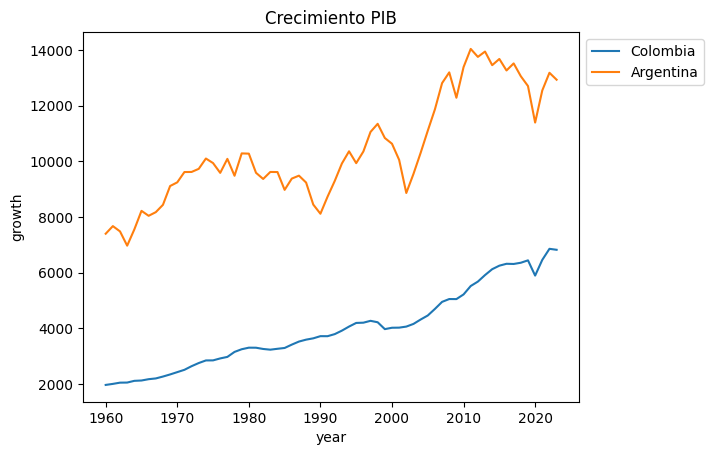

In [38]:
# Create the plot
for c in country:
    plt.plot(new_dict['df_per_capita_result'].columns, new_dict['df_per_capita_result'].transpose()[c], label=c) 

# Add title and labels
plt.title('Crecimiento PIB')
plt.xlabel('year')
plt.ylabel('growth')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
